<font size = "5"> **Chapter 3:  [Imaging](Ch3-Imaging.ipynb)** </font>


<hr style="height:1px;border-top:4px solid #FF8200" />

# Analysis of Spectrum Images - Core-Loss

part of 

<font size = "5"> **[Analysis of Transmission Electron Microscope Data](_Analysis_of_Transmission_Electron_Microscope_Data.ipynb)**</font>


by Gerd Duscher, 2019

Microscopy Facilities<br>
Joint Institute of Advanced Materials<br>
The University of Tennessee, Knoxville

Model based analysis and quantification of data acquired with transmission electron microscopes


## Content

Plotting, Interacting and Quantifying Spectrum Image data

Please cite for core-loss quantification:

[M. Tian et  al. *Measuring the areal density of nanomaterials by electron energy-loss spectroscopy*
Ultramicroscopy Volume 196, 2019, pages 154-160](https://doi.org/10.1016/j.ultramic.2018.10.009)

as a reference of this quantification method.

## First we import the relevant packages

In [ ]:
import sys
!{sys.executable} -m pip install  --upgrade pyTEMlib 

In [2]:
# import matplotlib and numpy
#                       use "inline" instead of "notebook" for non-interactive plots
%pylab --no-import-all notebook
%gui qt

from scipy.ndimage.filters import gaussian_filter

# import pyTEMlib packages
import pyTEMlib
import file_tools  as ft     # File input/ output library
import EELS_tools  as eels 

# For archiving reasons it is a good idea to print the version numbers out at this point
print('pyTEM version: ',pyTEMlib.__version__)

Populating the interactive namespace from numpy and matplotlib
pyTEM version:  0.2020.04.2


## Load and plot a spectrum

As an example we load the spectrum **1EELS Acquire (high-loss).dm3** from the *example data* folder.

Please see [Working with Spectrum Images](CH4-Working_with_Spectrum_Images.ipynb) for details on storage and plotting.

Channel_000 :  EELS Spectrum ImageFeAgA


<IPython.core.display.Javascript object>


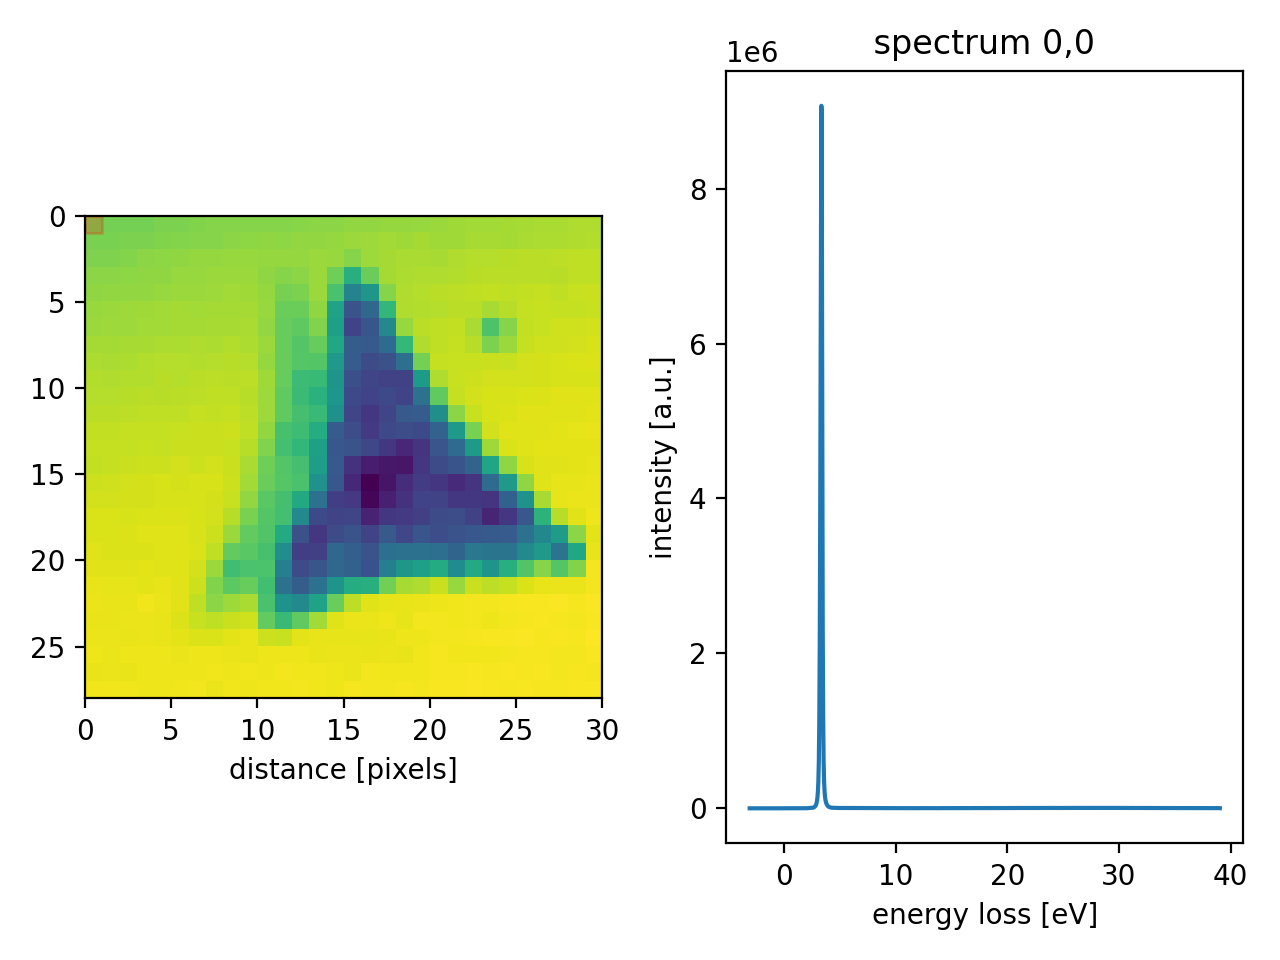

spectrum_image


In [3]:
import importlib
importlib.reload(ft)

# If a file is open, close it
try:
    h5_file.close()
except:
    pass
# Load new file
h5_file = ft.h5_open_file()#os.path.join(current_directory,filename))
current_channel = h5_file['Measurement_000/Channel_000']
measurement_group = h5_file['Measurement_000']


for key in list(measurement_group.keys()):
    if 'title' in measurement_group[key].keys(): 
        print(key,': ',measurement_group[key]['title'][()])
    else:
        print(key,': ')    
current_dataset = current_channel['nDim_Data']
                                        
view = ft.h5_plot(current_dataset)  # note this needs a view reference for interaction

In [4]:
for key in current_channel:
    if 'Log_' in key:
        print(key, current_channel[key]['analysis'][()])
h5_file.flush()

Log_000 Aligned SI


## Fix Energy Scale

If all spectra are shifted on the same energy-scale summation and comparison is just so much easier.

To shift the spectra,  we use [splev](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splev.html#scipy.interpolate.splev), and [splrep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splrep.html#scipy.interpolate.splrep) function of  [interpolate](https://docs.scipy.org/doc/scipy/reference/interpolate.html) package scipy .

C:\Users\gduscher\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:454: RuntimeWarning: Number of calls to function has reached maxfev = 2000.
  warnings.warn(errors[info][0], RuntimeWarning)


Log_000 Aligned SI


Box(children=(ToggleButton(value=False, description='fix_energy'), ToggleButton(value=False, description='fit_…

<IPython.core.display.Javascript object>


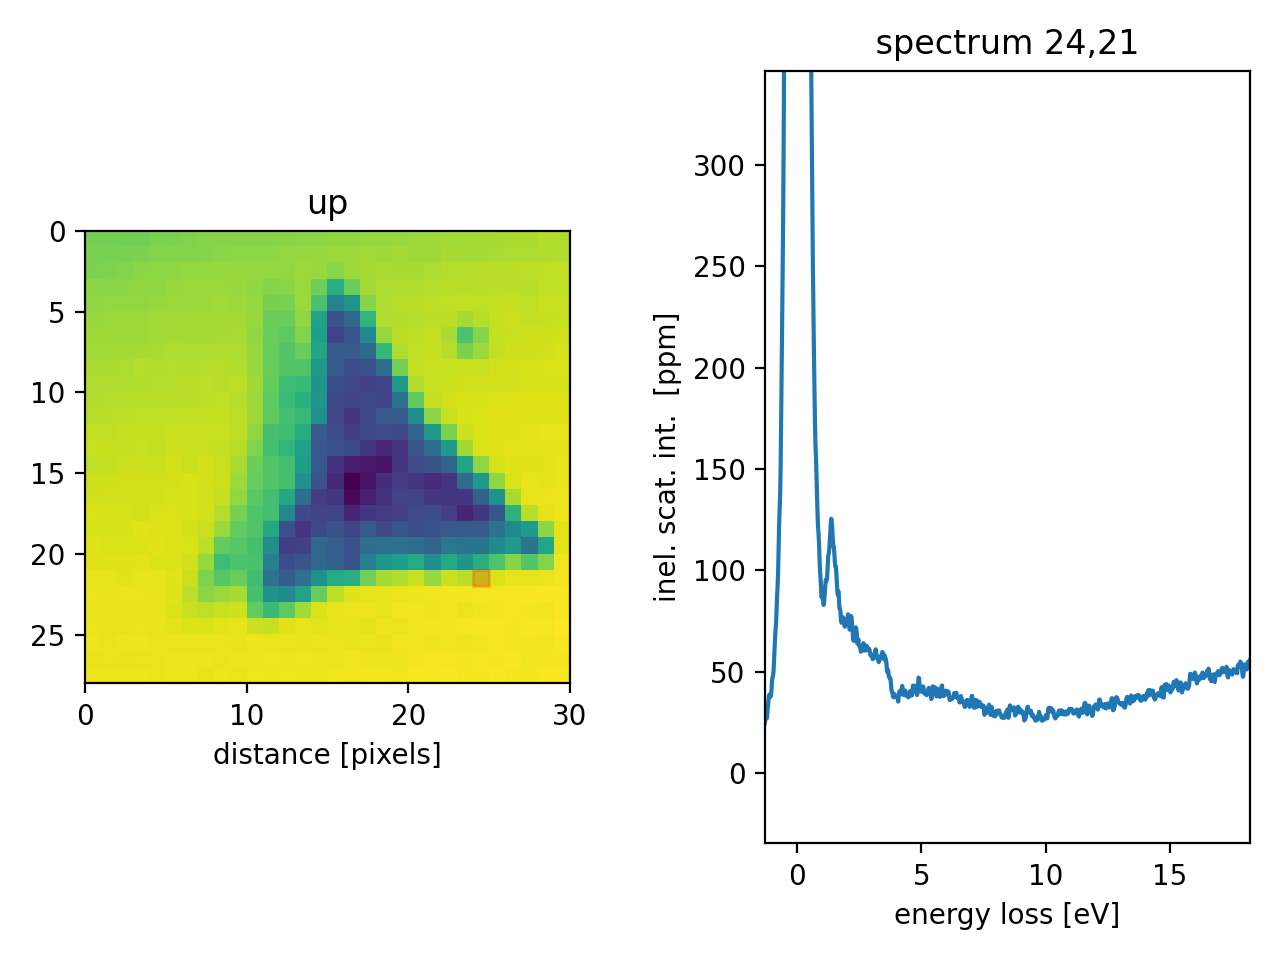

In [337]:
import EELS_tools  as eels 

import importlib
importlib.reload(ft)

spectrum_image = current_dataset
energy_scale = current_dataset.dims[2][0]

energy_shifts = eels.get_energy_shifts(spectrum_image, energy_scale, 0.35)
dispersion = energy_scale[1]-energy_scale[0]

if energy_shifts.min()> 0:
    shift = energy_shifts.max()
else:
    shift = energy_shifts.min()
master_energy_scale = np.arange(2048)*dispersion+energy_scale[0]-shift
shifted_SI = eels.shift_on_same_scale(spectrum_image,energy_shifts, energy_scale, master_energy_scale)

si_tags = {}

si_tags['data'] = shifted_SI
si_tags['data_type'] = 'spectrum_image'
si_tags['name'] = 'Aligned SI'

si_tags['new_energy_scale'] = master_energy_scale
si_tags['energy_shifts'] = energy_shifts

si_group = ft.add_spectrum_image(current_channel, si_tags)

for key in current_channel:
    if 'Log_' in key:
        print(key, current_channel[key]['analysis'][()])
h5_file.flush()



## Fit Low Loss Spectrum 

Log_000 Aligned SI


Box(children=(ToggleButton(value=False, description='fit_parameter'), ToggleButton(value=False, description='f…

HBox(layout=Layout(align_items='stretch', display='flex', flex_flow='row', visibility='hidden', width='95%'))

<IPython.core.display.Javascript object>


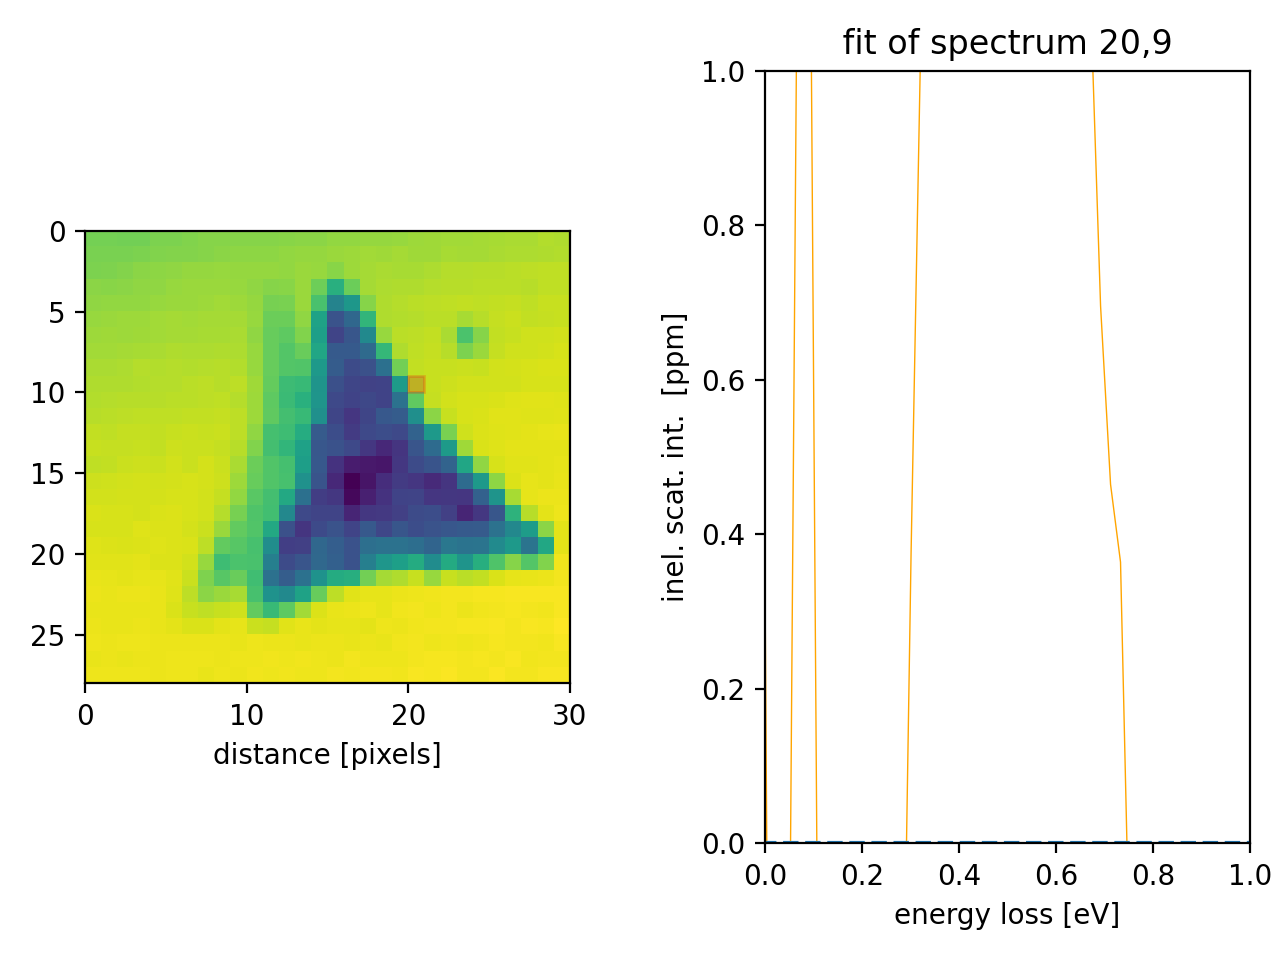

AttributeError: 'interactive_spectrum_image' object has no attribute 'start_fit'

In [19]:
import importlib
importlib.reload(eels)
for key in current_channel:
    if 'Log_' in key:
        print(key, current_channel[key]['analysis'][()])
        if 'Aligned' in current_channel[key]['analysis'][()]:
            si_group = current_channel[key]
h5_file.flush()

SI_plot= eels.interactive_spectrum_image(si_group['nDim_Data'], horizontal = True)
SI_plot.zero_loss_fit_width = 0.45

## Plot peak areas

<IPython.core.display.Javascript object>


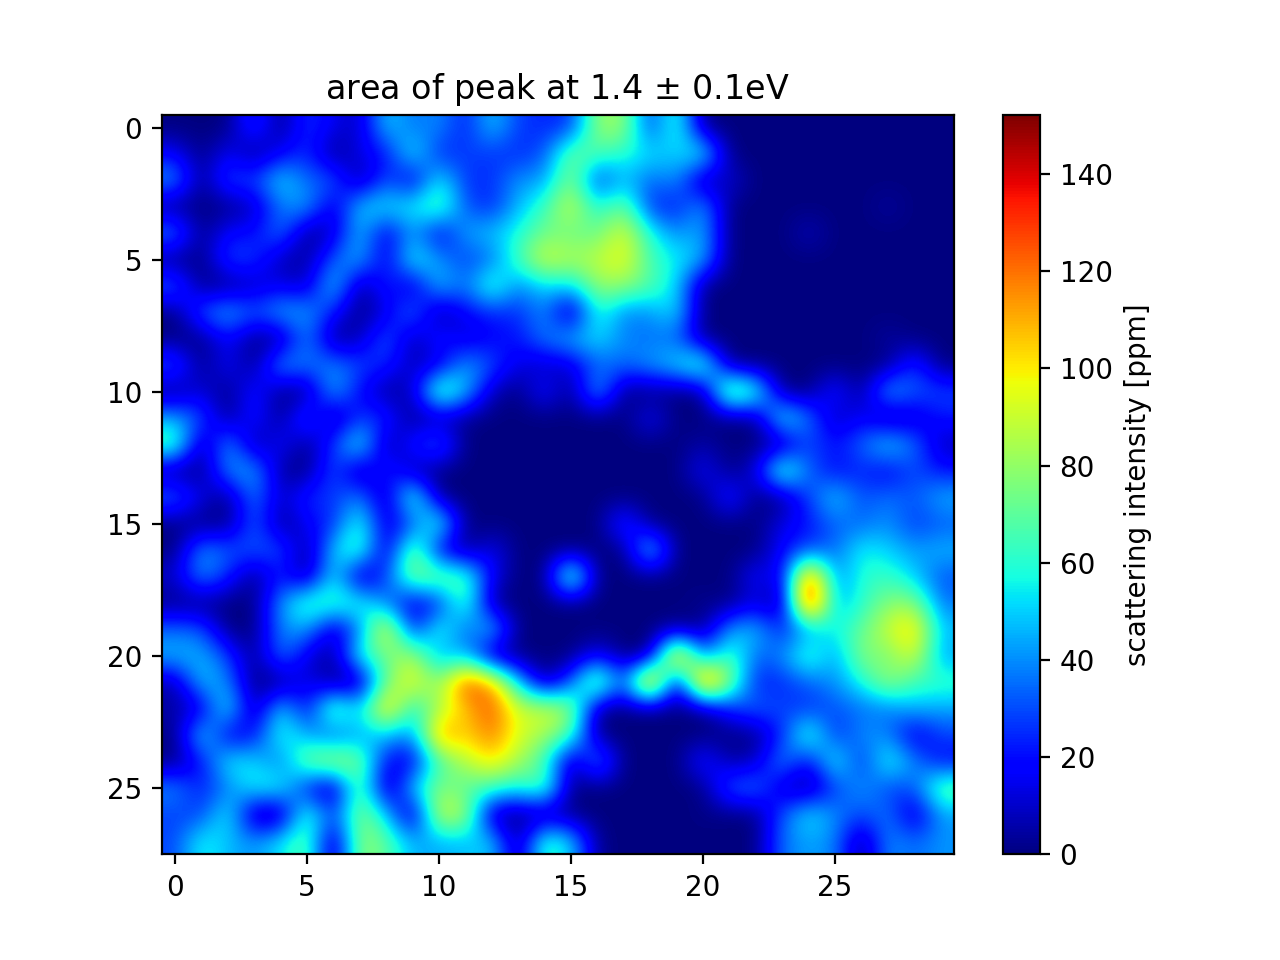

In [833]:
peak_number = 0 ## starts at zero
area = SI_plot.peak_parameters[peak_number][:,:,1]*SI_plot.peak_parameters[peak_number][:,:,2]*np.sqrt(np.pi/np.log2(2))
amplitude = SI_plot.peak_parameters[peak_number][:,:,1]
position = SI_plot.peak_parameters[peak_number][:,:,0]


area[np.abs(position-1.4)>.10]  = 0
plt.figure()
plt.title(r'area of peak at 1.4 $\pm$ 0.1eV')

plt.imshow(area.T, vmin = 0, cmap = 'jet', interpolation='bicubic')
plt.colorbar(label='scattering intensity [ppm]');

<IPython.core.display.Javascript object>


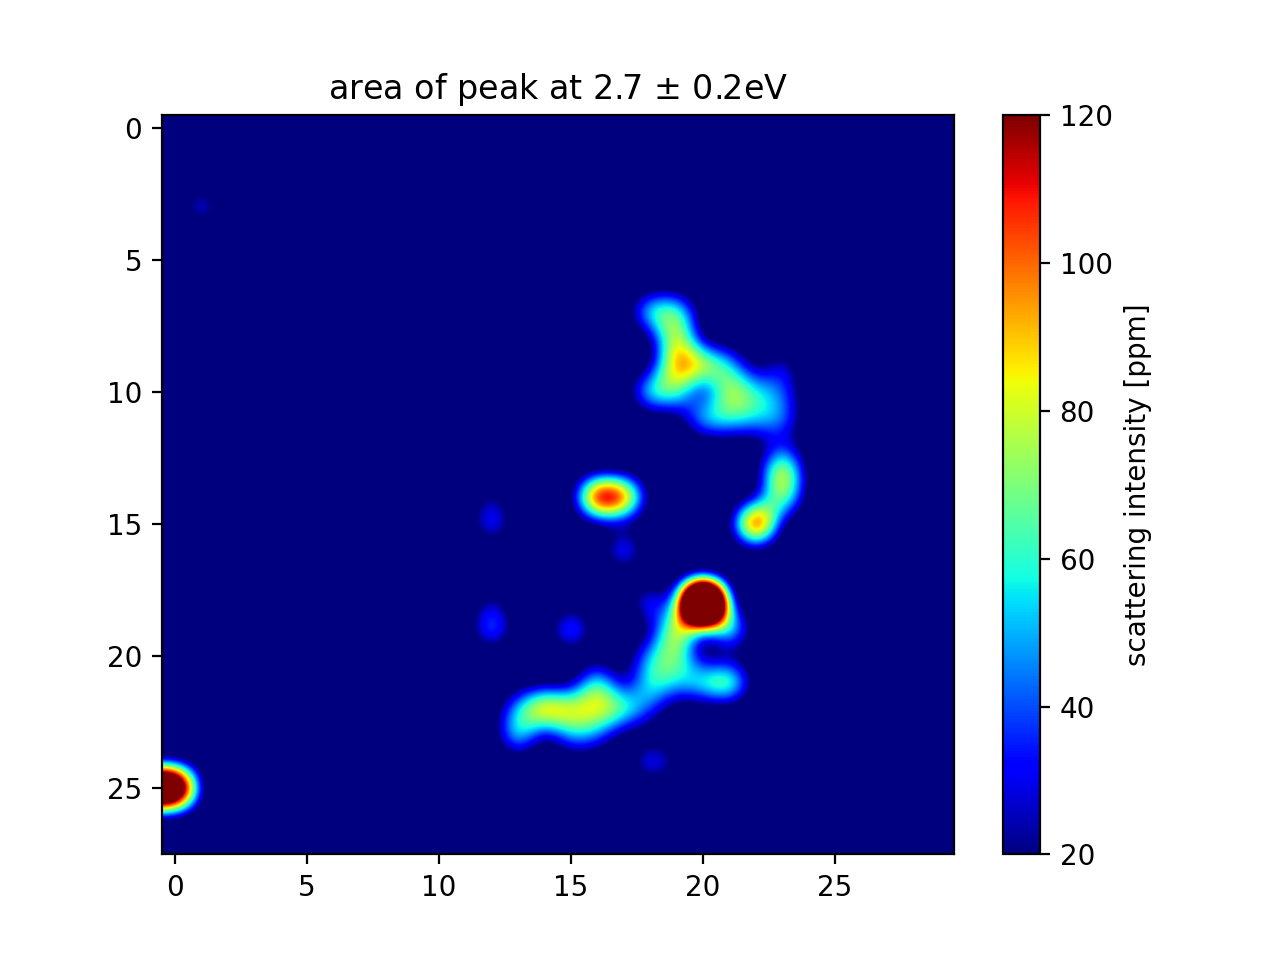

In [834]:
peak_number = 1
area2 = SI_plot.peak_parameters[peak_number][:,:,1]*SI_plot.peak_parameters[peak_number][:,:,2]*np.sqrt(np.pi/np.log2(2))
amplitude = SI_plot.peak_parameters[peak_number][:,:,1]
position = SI_plot.peak_parameters[peak_number][:,:,0]


area2[np.abs(position-2.7)>.20]  = 0

plt.figure()
plt.title(r'area of peak at 2.7 $\pm$ 0.2eV')
plt.imshow(area2.T, vmin = 20, vmax = 120, cmap = 'jet', interpolation='bicubic')
plt.colorbar(label='scattering intensity [ppm]');
#plt.imshow(area.T, alpha = 0.3, vmin = 0, cmap='jet')

## Print Input Parameter 

In [751]:
from IPython.display import HTML, display

def display_table(data):
    html = "<table>"
    for r, row in enumerate(data):
        html += "<tr>"
        if r == 0:
            for field in row:
                html += f"<td><h4>{field}</h4><td>"
        else:
            for i, field in enumerate(row):
                if i == 0:
                    html += f"<td><h4>{field}</h4><td>"
                else:
                    html += f"<td><h4>{field:.2f}</h4><td>"
        html += "</tr>"
    html += "</table>"
    display(HTML(html))

table_pin = [['peak', 'position [eV]', 'amplitude [ppm]', 'width [eV]']]
for i in range(int(len(SI_plot.pin)/3)):
    table_pin.append([i, SI_plot.pin[i*3],SI_plot.pin[i*3+1],SI_plot.pin[i*3+2]]) 

table_pout = [['peak', 'position [eV]', 'amplitude [ppm]', 'width [eV]']]
for i in range(int(len(SI_plot.pout)/3)):
    table_pout.append([i+1, SI_plot.pout[i*3],SI_plot.pout[i*3+1],SI_plot.pout[i*3+2]]) 

table_all = [['peak', 'position in','position fit', 'amplitude in', 'amplitude fit', 
              'width in ', 'width fit']]    
for i in range(int(len(SI_plot.pout)/3)):
    table_all.append([i+1, SI_plot.pin[i*3], SI_plot.pout[i*3],
                           SI_plot.pin[i*3+1], SI_plot.pout[i*3+1],
                           SI_plot.pin[i*3+2], SI_plot.pout[i*3+2]]) 


display_table(table_all)

In [664]:
import importlib
importlib.reload(eels)

SI_plot.do_All( selection= 'fit_low_loss', verbose = True)
        

## Add Data 

### Add survey image to file
If you have not done so before, add the survey image to the dataset (measurement group).

In [3]:
SI_channel = ft.h5add_channels(h5_file,current_channel,'survey image')
    
measurement_group = h5_file[current_channel.name.split('/')[1]]
    
for key in list(measurement_group.keys()):
    if 'title' in measurement_group[key].keys(): 
        print(key,': ',measurement_group[key]['title'][()])
    else:
        print(key,': ')   
        

Channel_000 :  13-EELS Spectrum Image (dark ref corrected)
Channel_001 :  survey image


### Add Z-contrast image
If you have not done so before, add the survey image to the dataset (measurement group).

In [4]:
Z_channel = ft.h5_add_channel(h5_file,current_channel,'Z-contrast image')

measurement_group = h5_file[current_channel.name.split('/')[1]]
    
for key in list(measurement_group.keys()):
    if 'title' in measurement_group[key].keys(): 
        print(key,': ',measurement_group[key]['title'][()])
    else:
        print(key,': ') 

Channel_000 :  13-EELS Spectrum Image (dark ref corrected)
Channel_001 :  survey image
Channel_002 :  Z-contrast image


### Add Survey Image to plot above

In [3]:
SI_plot.set_Survey_image(h5_file['Measurement_000']['Channel_001'])
SI_plot.overlay_data() 

### Overlay Z-contrast image on survey image at plot above

In [5]:
SI_plot.set_Survey_image(h5_file['Measurement_000']['Channel_001'])
SI_plot.overlay_Zcontrast_image(h5_file['Measurement_000']['Channel_002'])


In [9]:
SI_plot.set_Zcontrast_image(h5_file['Measurement_000']['Channel_002'])


<IPython.core.display.Javascript object>


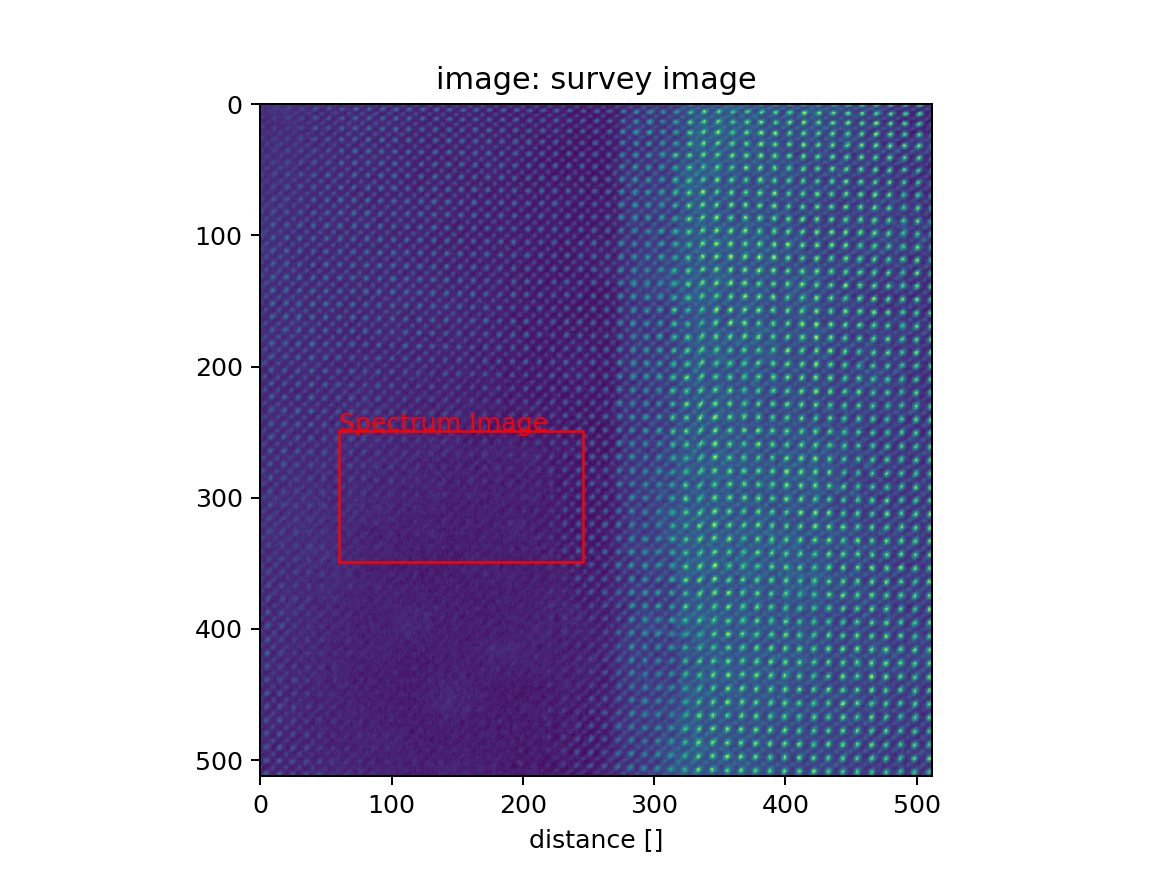

In [287]:
ft.h5_plot(h5_file['Measurement_000']['Channel_001'])

## Check on File Content

In [107]:
import pyUSID as usid 
usid.hdf_utils.print_tree(h5_file)


/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Log_000
      -------
      ├ X_section_unit
      ├ _Xsection_fit
      ├ edge_1_Z
      ├ edge_1_chemcial_shift
      ├ edge_1_data
      ├ edge_1_element
      ├ edge_1_end_exclude
      ├ edge_1_onset
      ├ edge_1_original_onset
      ├ edge_1_start_exclude
      ├ edge_1_symmetry
      ├ edge_2_Z
      ├ edge_2_chemcial_shift
      ├ edge_2_data
      ├ edge_2_element
      ├ edge_2_end_exclude
      ├ edge_2_onset
      ├ edge_2_original_onset
      ├ edge_2_start_exclude
      ├ edge_2_symmetry
      ├ edge_3_Z
      ├ edge_3_chemcial_shift
      ├ edge_3_data
      ├ edge_3_element
      ├ edge_3_end_exclude
      ├ edge_3_onset
      ├ edge_3_original_onset
      ├ edge_3_start_exclude
      ├ edge_3_symmetry
      ├ edge_4_Z
      ├ edge_4_chemcial_shift
      ├ edge_4_data
      ├ edge_4_element
      ├ edge_4_end_exclude
      ├ edge_4_onset
      ├ edge_4_original_onset
      ├ edge_4_start_exclu

## Close File
File needs to be closed to be used with other notebooks

In [835]:
h5_file.close()

## Navigation
### Back: [Calculating Dielectric Function II: Silicon](DielectricDFT2.ipynb)
### Next:  [ELNES](ELNES.ipynb)

### Chapter 4: [Spectroscopy](Spectroscopy.ipynb)
### Index: [Index](Analysis_of_Transmission_Electron_Microscope_Data.ipynb)